# Extend labels
The `extend_labels_with_maximum_radius` function, which has a counter part in scikit-image called `expand_labels` is a special dilation operation generating a label map corresponding to a simplified Voronoi diagram from a label image. Let's compare performance of the two.

**Note:** benchmarking results vary heavily depending on image size, kernel size, used operations, parameters and used hardware. Use this notebook to adapt it to your use-case scenario and benchmark on your target hardware. If you have different scenarios or use-cases, you are very welcome to submit your notebook as pull-request!

In [1]:
import pyclesperanto_prototype as cle
from skimage import filters
import time

# to measure kernel execution duration properly, we need to set this flag. It will slow down exection of workflows a bit though
cle.set_wait_for_kernel_finish(True)

# selet a GPU with the following in the name. This will fallback to any other GPU if none with this name is found
cle.select_device()

<Tesla V100-PCIE-32GB on Platform: NVIDIA CUDA (1 refs)>

The following example is taken from https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_expand_labels.html

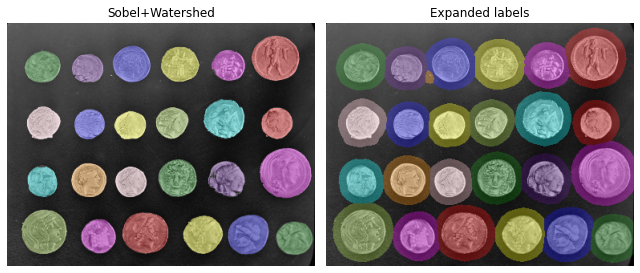

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.filters import sobel
from skimage.measure import label
from skimage.segmentation import watershed, expand_labels
from skimage.color import label2rgb
from skimage import data

coins = data.coins()

# Make segmentation using edge-detection and watershed.
edges = sobel(coins)

# Identify some background and foreground pixels from the intensity values.
# These pixels are used as seeds for watershed.
markers = np.zeros_like(coins)
foreground, background = 1, 2
markers[coins < 30.0] = background
markers[coins > 150.0] = foreground

ws = watershed(edges, markers)
seg1 = label(ws == foreground)

expanded = expand_labels(seg1, distance=10)

# Show the segmentations.
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 5),
                         sharex=True, sharey=True)

color1 = label2rgb(seg1, image=coins, bg_label=0)
axes[0].imshow(color1)
axes[0].set_title('Sobel+Watershed')

color2 = label2rgb(expanded, image=coins, bg_label=0)
axes[1].imshow(color2)
axes[1].set_title('Expanded labels')

for a in axes:
    a.axis('off')
fig.tight_layout()
plt.show()

In [3]:
# expanding labels with scikit-image
for i in range(0, 10):
    start_time = time.time()
    expanded = expand_labels(seg1, distance=10)
    print("skimage expand_labels duration: " + str(time.time() - start_time))

skimage expand_labels duration: 0.007819175720214844
skimage expand_labels duration: 0.007901430130004883
skimage expand_labels duration: 0.008239984512329102
skimage expand_labels duration: 0.007221221923828125
skimage expand_labels duration: 0.00722813606262207
skimage expand_labels duration: 0.006925106048583984
skimage expand_labels duration: 0.006987333297729492
skimage expand_labels duration: 0.006989479064941406
skimage expand_labels duration: 0.00685572624206543
skimage expand_labels duration: 0.006781101226806641


In [4]:
# expanding labels with pyclesperanto
labels_gpu = cle.push_zyx(seg1)

expanded = None

for i in range(0, 10):
    start_time = time.time()
    expanded = cle.extend_labels_with_maximum_radius(labels_gpu, expanded, 10)
    print("pyclesperanto extend_labels_with_maximum_radius duration: " + str(time.time() - start_time))

pyclesperanto extend_labels_with_maximum_radius duration: 0.34076929092407227
pyclesperanto extend_labels_with_maximum_radius duration: 0.0065593719482421875
pyclesperanto extend_labels_with_maximum_radius duration: 0.0065419673919677734
pyclesperanto extend_labels_with_maximum_radius duration: 0.0064771175384521484
pyclesperanto extend_labels_with_maximum_radius duration: 0.006433248519897461
pyclesperanto extend_labels_with_maximum_radius duration: 0.006488323211669922
pyclesperanto extend_labels_with_maximum_radius duration: 0.006287813186645508
pyclesperanto extend_labels_with_maximum_radius duration: 0.006483316421508789
pyclesperanto extend_labels_with_maximum_radius duration: 0.006468296051025391
pyclesperanto extend_labels_with_maximum_radius duration: 0.006577968597412109
